In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Building training and testing datasets from the cell_images folder

In [2]:
# Transforming the images to the fixed size = 128x128 (original image sizes vary!)
transform = transforms.Compose(
    [transforms.ToTensor(),
        transforms.Resize((32,32))
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

# two classes to be detected
classes = ('parasitized','uninfected')
batch_size = 128

train_db = torchvision.datasets.ImageFolder(root='cell_images/train',transform=transform)
test_db = torchvision.datasets.ImageFolder(root='cell_images/test',transform=transform)
train_loader = DataLoader(train_db, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_db, batch_size=batch_size, shuffle=True)

print("training dataset size =",len(train_db))
print("testing dataset size =",len(test_db))

training dataset size = 24958
testing dataset size = 2600


## Displaying samples of images from the dataset and verifying dataset size

batch size =  128


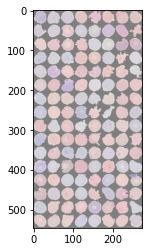

parasitized parasitized uninfected uninfected parasitized uninfected parasitized uninfected uninfected parasitized parasitized uninfected uninfected uninfected uninfected uninfected uninfected parasitized uninfected parasitized uninfected uninfected parasitized uninfected parasitized uninfected parasitized uninfected parasitized uninfected parasitized uninfected uninfected parasitized uninfected parasitized parasitized parasitized parasitized parasitized uninfected uninfected parasitized parasitized uninfected uninfected uninfected uninfected parasitized uninfected uninfected uninfected uninfected uninfected uninfected uninfected parasitized uninfected parasitized uninfected parasitized uninfected uninfected parasitized parasitized uninfected uninfected parasitized uninfected parasitized uninfected uninfected uninfected uninfected parasitized parasitized uninfected parasitized uninfected parasitized parasitized parasitized parasitized parasitized parasitized parasitized parasitized par

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
train_iter = iter(train_loader)
train_images, train_labels = next(train_iter)

print("batch size = ",len(train_images))

# # show images
imshow(torchvision.utils.make_grid(train_images))
# print labels
print(' '.join(f'{classes[train_labels[j]]:5s}' for j in range(batch_size)))


In [4]:
# One batch size
print("batch shape =",train_images.shape)
train_images_min,train_images_max = 1e9,-1e9
for batch_images, _ in test_loader:
        train_images_max = max(batch_images.view(-1).max(), train_images_max)
        train_images_min = min(batch_images.view(-1).min(), train_images_min)        
        
print("training images min =",train_images_min, " and max =",train_images_max)

batch shape = torch.Size([128, 3, 32, 32])
training images min = tensor(0.)  and max = tensor(1.)


## Creating a CNN model

In [5]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()      
        # 1 input image channel (grayscale), 10 output channels/feature maps
        # 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,3, padding=1)
        self.fc1 = nn.Linear(8*8*16,64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64,1)
        #self.fc3 = nn.Linear(128,64)
        #self.fc4 = nn.Linear(64,10)
        
        self.sigmoid = nn.Sigmoid()


    ## TODO: define the feedforward behavior
    def forward(self, x):
        # one activated conv layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        # x = self.dropout(x)
        x = self.fc2(x)
        #x = self.dropout(x)
        #x = F.relu(self.fc3(x))  
        #x = self.dropout(x)
        #x = F.relu(self.fc4(x))
        
        # final output
        return self.sigmoid(x.squeeze())

# instantiate and print your Net
net = CNN()
print(net)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [6]:
print(net(train_images))

tensor([0.5035, 0.5027, 0.5037, 0.5039, 0.5049, 0.5053, 0.5020, 0.5039, 0.5057,
        0.5042, 0.5036, 0.5034, 0.5055, 0.5042, 0.4990, 0.5020, 0.5006, 0.5021,
        0.5039, 0.5017, 0.5050, 0.5033, 0.5032, 0.5028, 0.5055, 0.5063, 0.5041,
        0.5022, 0.5039, 0.5051, 0.5028, 0.5041, 0.5051, 0.5075, 0.5049, 0.5026,
        0.5058, 0.5012, 0.5076, 0.4991, 0.5027, 0.5042, 0.5070, 0.5055, 0.5033,
        0.5056, 0.5039, 0.5036, 0.5049, 0.5041, 0.5044, 0.5053, 0.5027, 0.5040,
        0.5024, 0.5034, 0.5041, 0.5016, 0.5031, 0.5014, 0.5058, 0.5030, 0.5030,
        0.5066, 0.5027, 0.5049, 0.5051, 0.5029, 0.5047, 0.5044, 0.5015, 0.5045,
        0.5042, 0.5030, 0.5035, 0.5043, 0.4965, 0.5030, 0.5048, 0.5050, 0.5044,
        0.5042, 0.4989, 0.5047, 0.5031, 0.5060, 0.5042, 0.5046, 0.5054, 0.5075,
        0.5040, 0.5043, 0.5046, 0.5044, 0.5024, 0.5059, 0.5040, 0.5036, 0.5029,
        0.5058, 0.5046, 0.5039, 0.5036, 0.5023, 0.5032, 0.5032, 0.5036, 0.5039,
        0.5017, 0.5012, 0.5043, 0.5019, 

In [7]:

## TODO: specify loss function (try categorical cross-entropy)
criterion = torch.nn.BCELoss()

## TODO: specify optimizer 
optimizer = optim.SGD(net.parameters(), lr=0.1)

n_epochs = 1

In [8]:
def train(n_epochs):
    training_loss=[]
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            inputs, labels = data

            # wrap them in a torch Variable
            #inputs, labels = Variable(inputs), Variable(labels)        

            # zero the parameter (weight) gradients
            optimizer.zero_grad()

            # forward pass to get outputs
            outputs = net(inputs)

            # calculate the loss
            loss = criterion(outputs, labels.float())

            # backward pass to calculate the parameter gradients
            loss.backward()

            # update the parameters
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()   #################################### changed loss.data[0] to loss.item()
            
            if batch_i % 1 == 0:    # print every 1000 mini-batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss))
                training_loss.append(running_loss/1000)  #################### recording average loss per batch
                running_loss = 0.0

    print('Finished Training')
    return training_loss

In [ ]:
# define the number of epochs to train for
n_epochs = 1 # start small to see if your model works, initially

# call train
training_loss = train(n_epochs)

Epoch: 1, Batch: 1, Avg. Loss: 0.6923251152038574
Epoch: 1, Batch: 2, Avg. Loss: 0.6926873922348022
Epoch: 1, Batch: 3, Avg. Loss: 0.6924350261688232
Epoch: 1, Batch: 4, Avg. Loss: 0.6894387006759644
Epoch: 1, Batch: 5, Avg. Loss: 0.6938559412956238
Epoch: 1, Batch: 6, Avg. Loss: 0.6967647671699524
Epoch: 1, Batch: 7, Avg. Loss: 0.694654107093811
Epoch: 1, Batch: 8, Avg. Loss: 0.6929395794868469
Epoch: 1, Batch: 9, Avg. Loss: 0.6921429634094238
Epoch: 1, Batch: 10, Avg. Loss: 0.6922300457954407
Epoch: 1, Batch: 11, Avg. Loss: 0.6918556094169617
Epoch: 1, Batch: 12, Avg. Loss: 0.6867228746414185
Epoch: 1, Batch: 13, Avg. Loss: 0.6952438950538635
Epoch: 1, Batch: 14, Avg. Loss: 0.6928766965866089
Epoch: 1, Batch: 15, Avg. Loss: 0.6969034671783447
Epoch: 1, Batch: 16, Avg. Loss: 0.6917986869812012
Epoch: 1, Batch: 17, Avg. Loss: 0.6933048963546753
Epoch: 1, Batch: 18, Avg. Loss: 0.6907880902290344
Epoch: 1, Batch: 19, Avg. Loss: 0.6885960698127747
Epoch: 1, Batch: 20, Avg. Loss: 0.6917439